## Set-up

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Model parameters

Model equations:
\begin{align}
\frac{\partial N}{\partial t}&=-J(N,I)P+\phi_{z}Z+\gamma_{m}D \\
\frac{\partial P}{\partial t}&=(J(N,I)-\phi_{P})P-G(\epsilon,g,P)Z \\
\frac{\partial Z}{\partial t}&=(\beta G(\epsilon,g,P)-\phi_{z}-\phi^{*}_{Z}Z)Z\\
\frac{\partial D}{\partial t}&=\phi_{P}P+((1-\beta)G(\epsilon,g,P)+\phi^{*}_{Z}Z)Z-\gamma_{m}D
\end{align}
With:
\begin{align}
J(N,I)&=\mu_{m}\cdot f_{N}(N) \cdot f_{I}(I)=\mu_{m} \cdot \frac{N}{k_{N}+N} \cdot \frac{I}{k_{I}+I} \\
G(\epsilon,g,P)&=\frac{g \epsilon P^{2}}{g+\epsilon P^{2}}
\end{align}


In [30]:
def phyto_growth(mum,kn,ki,N,I):
    J=mum*(N/(kn+N))*(I/(ki+I))
    return J
def grazing_growth(g,epsilon,P):
    G=(g*epsilon*(P**2))/(g+epsilon*(P**2))
    return G
def compute_derivatives(N,P,Z,D,I,beta,mum,phip,phipqua,epsilon,g,phiz,phizqua,gammam,kn,ki):
    derivatives=[]
    Nderivative=-phyto_growth(mum,kn,ki,N,I)*P+phiz*Z+gammam*D
    derivatives.append(Nderivative)
    Pderivative=(phyto_growth(mum,kn,ki,N,I)-phip)*P-grazing_growth(g,epsilon,P)*Z
    derivatives.append(Pderivative)
    Zderivative=(beta*grazing_growth(epsilon,g,P)-phiz-phizqua*Z)*Z
    derivatives.append(Zderivative)
    Dderivative=phip*P+((1-beta)*grazing_growth(epsilon,g,P)+phizqua*Z)*Z-gammam*D
    derivatives.append(Dderivative)
    return derivatives
def solution_euler(N,P,Z,D,I,beta,mum,phip,phipqua,epsilon,g,phiz,phizqua,gammam,kn,ki,timestep):
    derivatives=compute_derivatives(N,P,Z,D,I,beta,mum,phip,phipqua,epsilon,g,phiz,phizqua,gammam,kn,ki)
    Nt=N+timestep*derivatives[0]
    Pt=P+timestep*derivatives[1]
    Zt=Z+timestep*derivatives[2]
    Dt=D+timestep*derivatives[3]
    return Nt,Pt,Zt,Dt
def model(N,P,Z,D,I,beta,mum,phip,phipqua,epsilon,g,phiz,phizqua,gammam,kn,ki,timestep,num_iter):
    N_vec=[]
    P_vec=[]
    Z_vec=[]
    D_vec=[]
    N_vec.append(N)
    P_vec.append(P)
    Z_vec.append(Z)
    D_vec.append(D)
    No=N
    Po=P
    Zo=Z
    Do=D
    for i in range(num_iter):
        Nt,Pt,Zt,Dt=solution_euler(No,Po,Zo,Do,I,beta,mum,phip,phipqua,epsilon,g,phiz,phizqua,gammam,kn,ki,timestep)
        N_vec.append(Nt)
        P_vec.append(Pt)
        Z_vec.append(Zt)
        D_vec.append(Dt)
        No=Nt
        Po=Pt
        Zo=Zt
        Do=Dt
    return N_vec,P_vec,Z_vec,D_vec

    
    
    
    

In [47]:
Cref=1.066
c=1
beta=0.925
alpha=0.256
mum=0.270
phip=0.04
phipqua=0
epsilon=1.6
g=1.575
phiz=0.01
phizqua=0
gammam=0.048
kn=0.7
ki=0.5
I=2
timestep=0.1
num_iter=100
N=0.9
P=1
Z=0.2
D=0.1
N_vec,P_vec,Z_vec,D_vec=model(N,P,Z,D,I,beta,mum,phip,phipqua,epsilon,g,phiz,phizqua,gammam,kn,ki,timestep,num_iter)

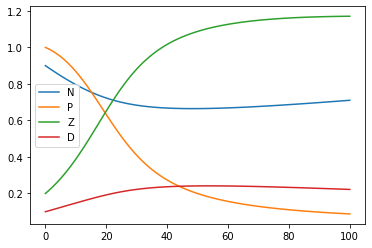

In [48]:
plt.figure()
plt.plot(N_vec,label="N")
plt.plot(P_vec,label="P")
plt.plot(Z_vec,label="Z")
plt.plot(D_vec,label="D")
plt.legend()
plt.show()